In [35]:
import numpy as np
import matplotlib.pyplot as plt
 
# Load Close column as strings
stock = np.genfromtxt(
    "stock_prices.csv",
    delimiter=",",
    skip_header=1,
    usecols=1,      #correct column for Close
    dtype=str,
    encoding="utf-8"
)
 
# Clean and convert to float
close_prices = np.array([
    float(x.replace('"', '').replace(',', '').strip())
    for x in raw_close if x.strip()
])
 
print(close_prices)
print("Total records:", len(close_prices))

[270.49  259.59  258.78  252.23  256.88  262.8   250.56  261.95  281.83
 294.8   301.02  310.7   264.77  307.52  309.58  300.99  299.68  299.1
 298.33  299.02  284.96  294.84  295.2   289.46  290.54  279.44  285.5
 263.24  280.95  280.74  288.95  301.66  303.15  305.01  311.86  319.27
 322.82  320.1   321.64  321.9   308.44  305.5   335.45  338.69  347.64
 356.41  355.49  352.45  370.34  379.57  341.99  348.17  349.54  300.84
 298.14  290.17  297.18  306.65  308.74  297.43  303.2   313.58  320.23
 323.85  322.69  310.1   318.87  316.71  318.96  322.47  318.51  308.9
 309.16  310.86  335.07  342.95  349.93  344.5   342.    333.01  333.63
 347.51  362.22  352.55  370.83  358.17  357.72  344.78  342.77  332.1
 317.66  316.09  319.5   291.13  296.74  291.82  284.73  291.72  283.76
 278.85  277.85  279.07  275.01  284.49  276.82  284.54  286.48  284.18
 291.97  301.06  305.02  306.85  301.97  302.77  294.09  284.45  301.15
 299.92  293.9   294.075 285.48  280.69  283.46  283.37  290.24  300

In [36]:
# Calculate daily returns (% change from previous day)
daily_returns = (close_prices[1:] - close_prices[:-1]) / close_prices[:-1] * 100

In [37]:
#  Compute mean and standard deviation
mean_return = np.mean(daily_returns)
std_return = np.std(daily_returns)
print(f"\nMean of daily returns: {mean_return:.4f}%")
print(f"Standard deviation of daily returns: {std_return:.4f}%")


Mean of daily returns: 0.0116%
Standard deviation of daily returns: 2.7617%


In [38]:
# Identify top 5 positive and negative return days
top5_positive_indices = np.argsort(daily_returns)[-5:][::-1] + 1  # +1 to match original dataset
top5_negative_indices = np.argsort(daily_returns)[:5] + 1
print("\nTop 5 days with highest positive returns (indices):", top5_positive_indices)
print("Top 5 days with highest negative returns (indices):", top5_negative_indices)


Top 5 days with highest positive returns (indices): [ 13 585 679  42 174]
Top 5 days with highest negative returns (indices): [ 12  53 743  50  93]


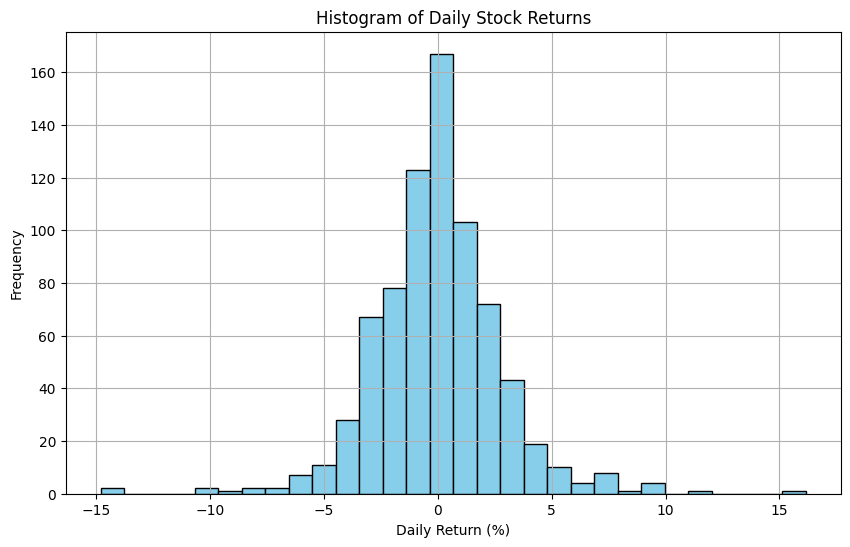

In [39]:
# Plot histogram of daily returns
plt.figure(figsize=(10,6))
plt.hist(daily_returns, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Stock Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()